In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.preprocessing import normalize 
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
import pickle

In [2]:
raw_data_1 = pd.read_csv("./eproc.csv")

raw_data_1.head(100)

,Kode,Nama Paket,Instansi,Tahap,HPS
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt"
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt"
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt"
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt
...,...,...,...,...,...
95,6420119,Pengadaan Generator Set 100 Kva / 80 Kw spse 4...,PDAM Tirta Moedal,Tender Sudah Selesai,335 Jt
96,6419119,Pengadaan Gate Valve Tahun 2019 Tender Ulang s...,PDAM Tirta Aji Kabupaten Wonosobo,Tender Sudah Selesai,"316,3 Jt"
97,6418119,Management Pressur Jaringan Distribusi Tender ...,PDAM Tirta Aji Kabupaten Wonosobo,Tender Sudah Selesai,468 Jt
98,6417119,Pengadaan Pemancar FM 1 KW + Antena + Coaxcial...,Lembaga Penyiaran Radio Republik Indonesia,Tender Sudah Selesai,"728,9 Jt"


In [3]:
data_1 = raw_data_1.drop(raw_data_1.columns[[0, 3, 4]], axis=1)

In [4]:
data_1.head(10)

,Nama Paket,Instansi
0,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional
1,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional
2,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional
3,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional
4,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional
5,Tenaga Ahli Transportasi (Sektor Jalan dan Dar...,Kementerian Perencanaan Pembangunan Nasional
6,Tenaga Ahli Muda Transportasi (Sektor Laut) Ke...,Kementerian Perencanaan Pembangunan Nasional
7,Tenaga Ahli Muda Transportasi Kegiatan Integra...,Kementerian Perencanaan Pembangunan Nasional
8,Tenaga Ahli Muda GIS Kegiatan Koordinasi Strat...,Kementerian Perencanaan Pembangunan Nasional
9,Tenaga Ahli Kelembagaan dan Kebijakan Publik K...,Kementerian Perencanaan Pembangunan Nasional


In [5]:
data_1.select_dtypes('object').isna().sum()

Nama Paket    0
Instansi      0
dtype: int64

In [6]:
data_1.shape

(2928, 2)

In [7]:
data_1

,Nama Paket,Instansi
0,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional
1,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional
2,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional
3,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional
4,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional
...,...,...
2923,Jasa Kebersihan di Lingkungan Sekretariat Kabi...,Sekretariat Kabinet
2924,"Pemeliharaan Prasarana TIK (Jaringan Komputer,...",Kementerian Perencanaan Pembangunan Nasional
2925,Pemeliharaan Sistem Transportasi Gedung spse 3...,Kementerian Perencanaan Pembangunan Nasional
2926,Pemeliharaan Taman spse 3 Jasa Lainnya - TA 2...,Kementerian Perencanaan Pembangunan Nasional


In [8]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
countVectorizer = CountVectorizer
tfidfVectorizer = TfidfVectorizer()
transformer = TfidfTransformer()

In [9]:
result_preprocessing = []
for column in data_1['Nama Paket']:
    sentence = column.lower()
    word = word_tokenize(text = sentence)
    result_remove_punctuation = [result for result in word if result not in list(string.punctuation)]
    result_remove_stopwords = [result for result in result_remove_punctuation if not result in stopwords]
    result_remove_stopwords = ' '.join(result_remove_stopwords)
    result_preprocessing.append(result_remove_stopwords)

In [10]:
data_1['preprocessing'] = result_preprocessing

In [11]:
data_1

,Nama Paket,Instansi,preprocessing
0,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli data driven kegiatan koordinasi se...
1,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli it analisa sistem kegiatan koordin...
2,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior monitoring evaluasi strateg...
3,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior perencanaan strategic natio...
4,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...
2923,Jasa Kebersihan di Lingkungan Sekretariat Kabi...,Sekretariat Kabinet,jasa kebersihan lingkungan sekretariat kabinet...
2924,"Pemeliharaan Prasarana TIK (Jaringan Komputer,...",Kementerian Perencanaan Pembangunan Nasional,pemeliharaan prasarana tik jaringan komputer p...
2925,Pemeliharaan Sistem Transportasi Gedung spse 3...,Kementerian Perencanaan Pembangunan Nasional,pemeliharaan sistem transportasi gedung spse 3...
2926,Pemeliharaan Taman spse 3 Jasa Lainnya - TA 2...,Kementerian Perencanaan Pembangunan Nasional,pemeliharaan taman spse 3 jasa lainnya ta 2014...


In [12]:
vectorScaler = pickle.load(open('vectorScaler.pickle', 'rb'))
vectorNormalize = normalize(vectorScaler)

In [13]:
kmeans_obj = pickle.load(open('kmeans.pickle', 'rb'))
result_clustering = kmeans_obj.predict(vectorNormalize)

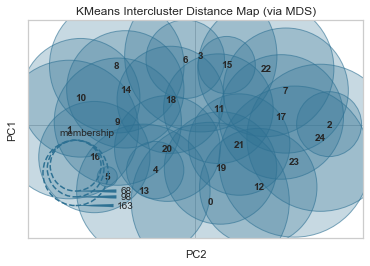

In [14]:
visualizer_kmeans = InterclusterDistance(kmeans_obj, random_state = 50)
visualizer_kmeans.fit(vectorNormalize)
visualizer_kmeans.finalize()

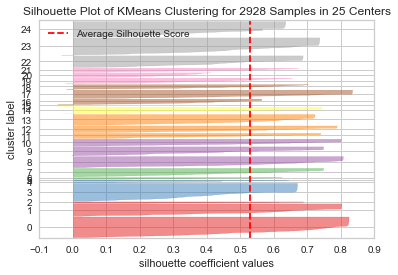

In [15]:
visualizer_kmeans_silhouette = SilhouetteVisualizer(kmeans_obj, color='yellowbrick')
visualizer_kmeans_silhouette.fit(vectorNormalize)
visualizer_kmeans_silhouette.show()

In [16]:
labels = kmeans_obj.labels_
silhouette_score = metrics.silhouette_score(vectorNormalize, labels, metric='euclidean')
silhouette_score

0.5297253265473189

In [17]:
data_1['clustering'] = result_clustering
data_1

,Nama Paket,Instansi,preprocessing,clustering
0,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli data driven kegiatan koordinasi se...,23
1,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli it analisa sistem kegiatan koordin...,23
2,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior monitoring evaluasi strateg...,19
3,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior perencanaan strategic natio...,19
4,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli muda bidang energy policy kegiatan...,0
...,...,...,...,...
2923,Jasa Kebersihan di Lingkungan Sekretariat Kabi...,Sekretariat Kabinet,jasa kebersihan lingkungan sekretariat kabinet...,16
2924,"Pemeliharaan Prasarana TIK (Jaringan Komputer,...",Kementerian Perencanaan Pembangunan Nasional,pemeliharaan prasarana tik jaringan komputer p...,3
2925,Pemeliharaan Sistem Transportasi Gedung spse 3...,Kementerian Perencanaan Pembangunan Nasional,pemeliharaan sistem transportasi gedung spse 3...,3
2926,Pemeliharaan Taman spse 3 Jasa Lainnya - TA 2...,Kementerian Perencanaan Pembangunan Nasional,pemeliharaan taman spse 3 jasa lainnya ta 2014...,1


In [18]:
def search_weights(search_keys):  
    search_query_weights = search_keys.lower()
    tfidf_weights_matrix = tfidfVectorizer.fit_transform(result_preprocessing)
    search_query_weights = tfidfVectorizer.transform([search_keys])

    return search_query_weights, tfidf_weights_matrix

In [19]:
weights_search, tfidf_weights = search_weights('ahli tenaga')
print(weights_search)

  (0, 3132)	0.6983572577284589
  (0, 515)	0.7157493559745527


In [20]:
def cos_similarity(search_query_weights, tfidf_weights_matrix):

    cosine_distance = cosine_similarity(search_query_weights, tfidf_weights_matrix)
    similarity_list = cosine_distance[0]

    return similarity_list

In [21]:
similarity = cos_similarity(weights_search, tfidf_weights)
df = pd.DataFrame({'res':similarity})
df = df.sort_values(by=['res'],ascending=False)

index= []
for i in df.index: 
    index.append(i)

for i in index:
    print(data_1['Nama Paket'].loc[i])
    print('\n')

TENAGA AHLI BIDANG EVALUASI spse 3  Jasa Konsultansi Perorangan - TA 2018 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Keuangan Tender Ulang spse 3  Jasa Konsultansi Perorangan - TA 2017 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Ekonomi Wilayah spse 4.3  Jasa Konsultansi Perorangan - TA 2019 - Seleksi - Pascakualifikasi Dua File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli KPBU 2 spse 3  Jasa Konsultansi Perorangan - TA 2018 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Komunikasi Publik spse 3  Jasa Konsultansi Perorangan - TA 2018 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Tenaga Ahli Komunikasi KPPIP spse 3  Jasa Konsultansi Perorangan - TA 2016 - Seleksi Sederhana - Pascakualifikasi Satu F

Tenaga Ahli Kehutanan Dalam Rangka Penyusunan Kajian Pengaruh Kebijakan Konservasi Sumber Daya Air Di Dalam DAS Terhadap Sektor Kehutanan Dan Sektor Lainnya Tender Ulang spse 3  Jasa Konsultansi Perorangan - TA 2015 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Bidang Teknik Kimia Untuk Mendukung Pelaksanaan Kajian Pengembangan Energi Berbasis Hutan Untuk Mendukung Forest Based  Cluster Industry Tender Ulang spse 3  Jasa Konsultansi Perorangan - TA 2016 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Evaluasi Kegiatan Evaluasi Peran Kelembagaan KPHL dalam rangka Optimalisasi Potensi Hutan Lindung Tahun Anggaran 2015  Tender Ulang spse 3  Jasa Konsultansi Perorangan - TA 2015 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Jasa Konsultansi Perorangan Tenaga Ahli Muda II Bidang Sistem Informas

Pengadaan Bahan Komputer spse 3  Pengadaan Barang - TA 2014 - Lelang Sederhana - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Lampu Neon dan Alat Listrik Kantor LAN Jakarta spse 4  Pengadaan Barang - TA 2016 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Rak Besi (Tahap 2) spse 4  Pengadaan Barang - TA 2016 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan dan Pemasangan Genset & Perangkat Pendukungnya di Kantor Kementerian Koordinator Bidang Perekonomian spse 3  Pengadaan Barang - TA 2016 - Lelang Sederhana - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pekerjaan Rehabilitasi Lantai Sayap Barat spse 3  Pekerjaan Konstruksi - TA 2016 - Lelang Pemilihan Langsung - Pascakualifikasi Satu File Harga Terendah Sistem GugurN



PENGEMBANGAN SISTEM ID-SIRTII spse 3  Pengadaan Barang - TA 2014 - Lelang Umum - Pascakualifikasi Dua File Sistem NilaiNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Rehabilitasi Gedung Utama spse 3  Pekerjaan Konstruksi - TA 2014 - Lelang Umum - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Meubeleir KPP dan PA spse 3  Pengadaan Barang - TA 2014 - Lelang Umum - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


KAJIAN IDENTIFIKASI PERMASALAHAN DAN REKOMENDASI PENYELESAIAN UNTUK PERCEPATAN PEMBANGUNAN PROYEK-PROYEK INFRASTRUKTUR PRIORITAS MP3EI spse 3  Jasa Konsultansi Badan Usaha - TA 2014 - Seleksi Umum - Prakualifikasi Dua File Kualitas dan BiayaNilai Kontrak : Nilai Kontrak belum dibuat


Pekerjaan Renovasi Interior Ruang Kerja Staf Wamen, Ruang Tamu Wamen, Ruang Kerja PPID, Ruang PABX, Ruang Panel, Ruang Pompa Distribusi, Ruang IBKK/IBAU, Ruang UPS dan Ruang Ker



Pengadaan Jasa Kantor Akuntan Publik Untuk Mengaudit Laporan Dana Kampanye Partai Politik Tingkat Pusat dan Calon Anggota DPD Peserta Pemilu Tahun 2014
Paket 6 Tender Ulang spse 3  Jasa Lainnya - TA 2014 - Lelang Sederhana - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Penyusunan Profil Kompetensi (Uji Kompetensi) Pejabat Struktural Eselon III dan IV Kementerian Sekretariat Negara RI spse 4  Jasa Konsultansi Badan Usaha - TA null - Seleksi Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Thermal Vacuum Chamber spse 4  Pengadaan Barang - TA 2016 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Rp 12.760.000.000,00


Sound System untuk Ruang Rapat Tender Ulang spse 4  Pengadaan Barang - TA 2016 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


CCTV spse 4  Pengadaan Barang 

Pembangunan Borr Selatan Kampus UI Depok spse 4.3  Evaluasi UlangPekerjaan Konstruksi - TA 2019 - Tender - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pemeliharaan Pendingin Udara (AC) dilingkungan UI Kampus Depok dan Salemba spse 4.3  Jasa Lainnya - TA 2019 - Tender - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Jasa Konsultan Badan Usaha  Pengembangan Aplikasi Katalog Elektronik dan e-Purchasing beserta Aplikasi Pendukung Lainnya spse 4.3  Evaluasi UlangJasa Konsultansi Badan Usaha - TA 2019 - Seleksi - Prakualifikasi Dua File Pagu AnggaranNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Furniture Sekolah Ilmu Lingkungan UI Kampus Salemba spse 4.3  Pengadaan Barang - TA 2019 - Tender - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Peralatan Laboratorium Riset Fakultas Hukum Universitas Diponegoro Ta

Pengadaan ATK operasional kantor Pusdiklat BPK RI spse 4  Pengadaan Barang - TA 2017 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Jasa Konsultansi Pengawasan Pembangunan Fasilitas Parkir VVIP di atas sungai Seleksi Ulang spse 3  Jasa Konsultansi Badan Usaha - TA 2017 - Seleksi Sederhana - Pascakualifikasi Satu File Biaya TerendahNilai Kontrak : Nilai Kontrak belum dibuat


Pembangunan Sumur Air Tanah Dalam spse 3  Pekerjaan Konstruksi - TA 2017 - Lelang Pemilihan Langsung - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pembangunan Instalasi Chlorinasi dan Aerasi spse 3  Evaluasi UlangPekerjaan Konstruksi - TA 2017 - Lelang Pemilihan Langsung - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Buku Koleksi Perpustakaan SD (DAK 2017) spse 4  Pengadaan Barang - TA 2017 - Tender Cepat - Pascakualifikasi Satu F